# AE4465 (MM&A) - Lecture 2 (Random variables)

A random variable (RV) (also called random quantity, aleatory variable, or stochastic variable) is a quantity or object that depend on random events.

Matematically, it is a function
$$ X\colon \Omega \to E $$

from possible outcomes $\Omega$ in a sample space to a measurable space $E$.

## Examples of random variables
$X:$ Number of times 6 occurs in the dice rolled for 10 times. $X$ can take value of  1 to 10 with 1 and 10 having least probability.
$X:$ Number of heads occurring the coin flipped for 10 times. $X$ can take value of  1 to 10 with 1 and 10 having least probability.
$X:$ Number of students scoring more than 80 marks in a test
$X:$ The number of people coming to the shop between 11 AM and 12 PM. $X$ can take value from 1 to N with varying probabilities.
$X:$ Number of cars passing a building between 9 and 10 AM
$X:$ Number of people traveling by flight on any particular day from an airport
$X:$ Number of sales on any particular day
$X:$ Number of people visiting a website on any particular day
$X:$ Time to failure of a type of equipment
$X:$ Number of failures in a year for a repairable equipment

### Probability distribution

Random variables are variables whose values can’t be predicted with certainty. Thus, the random variables must be associated with the probability distribution which specifies the probability of the random variable taking different values. You will learn how to empirically construct these functions. Let us see an example on which we depart from a csv file (data//RV_data.csv).

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reliability

In [3]:
# Import the data in csv file
maintenance_dt = pd.read_csv('data\\RV_data.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(maintenance_dt.columns, range(len(maintenance_dt.columns))):
    print(i, '- Column: ', colname)

The columns of the csv file are: 
0 - Column:  Equipment
1 - Column:  Time to failure


### Histogram from scratch

Histograms are a type of bar plot for numeric data that group the data into bins. We will use the maintenance data of the time to failure (TTFs) to create a histogram from scratch.


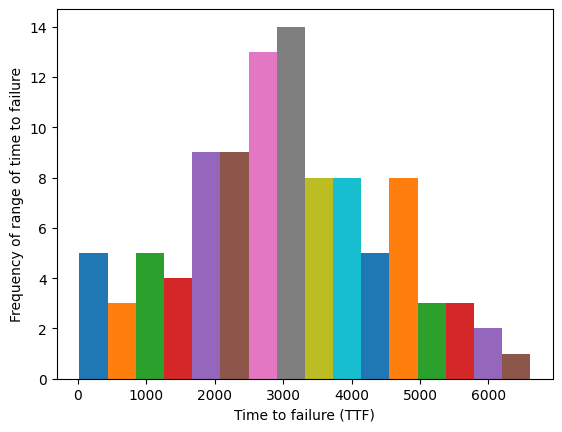

In [4]:
# Calculate the range of values
arbitrary_n_bins = 15
ttfs = maintenance_dt['Time to failure']
range_len = np.max(ttfs) - np.min(ttfs)
bin_len = range_len / arbitrary_n_bins
count = 0
for i in range(arbitrary_n_bins + 1):
    bar_x = np.min(ttfs) + i * bin_len + 0.5 * bin_len
    bar_y = len(ttfs[ttfs >= bar_x - bin_len * 0.5][ttfs < bar_x + bin_len * 0.5])
    plt.bar(x = bar_x, height=bar_y,width=bin_len)
plt.xlabel('Time to failure (TTF)')
plt.ylabel('Frequency of range of time to failure')
plt.show()

### Probability density function

The density parameter of the histogram function normalizes bin heights so that the integral of the histogram is one. The resulting histogram is an approximation of the probability density function (pdf).

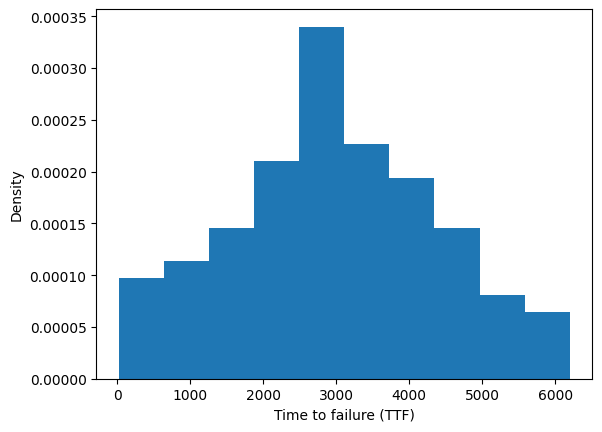

In [5]:
plt.hist(ttfs, density=True)
plt.xlabel('Time to failure (TTF)')
plt.ylabel('Density')
plt.show()

### Kernel Density Estimation
We now plot the histogram directly and the line of Kernel density estimation (KDE).

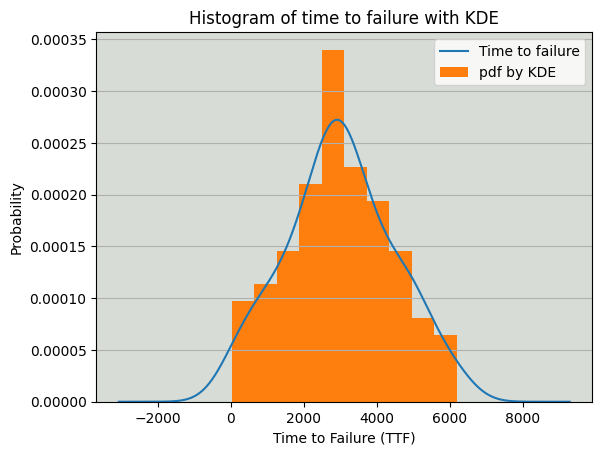

In [6]:
dist = maintenance_dt['Time to failure']
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram of time to failure with KDE')
dist.plot.hist(density=True, ax=ax, label='pdf by KDE')
plt.legend()
ax.set_ylabel('Probability')
ax.grid(axis='y')
plt.xlabel('Time to Failure (TTF)')
ax.set_facecolor('#d8dcd6')

### Fitting a distribution and finding the parameters

We will use Fit_Everything (reliability package) on some failure event data to return only the dataframe of results. We show the 4 plots that provide graphical goodness of fit indications.

/Users/marciabaptista/LearningPythonWithMaintenance/lib/python3.11/site-packages/reliability/Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma      Lambda  Log-likelihood    AICc     BIC       AD optimizer
      Normal_2P                                                                          2995.41  1454.82                    -870.157 1744.44 1749.53 0.390387       TNC
     Weibull_CR                         26491.2 0.746702 3836.57 2.93494                                                     -866.052 1740.53 1750.53 0.379825       TNC
Weibull_Mixture                         566.832 0.951316 3630.71 2.69907    0.0878152                                        -865.926 1742.49 1754.88 0.351483       TNC
     Weibull_2P 3333.61 2.01269                                                                                              -874.238  1752.6 1757.69  1.29454       TNC
     Weibull_DS 3333.61 2.01269                   

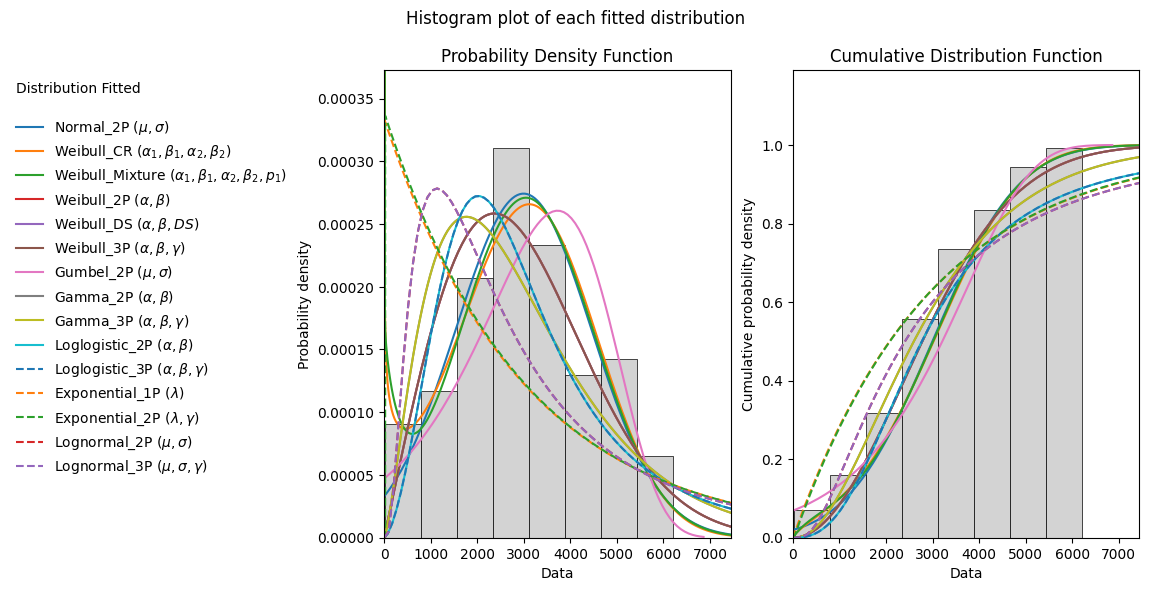

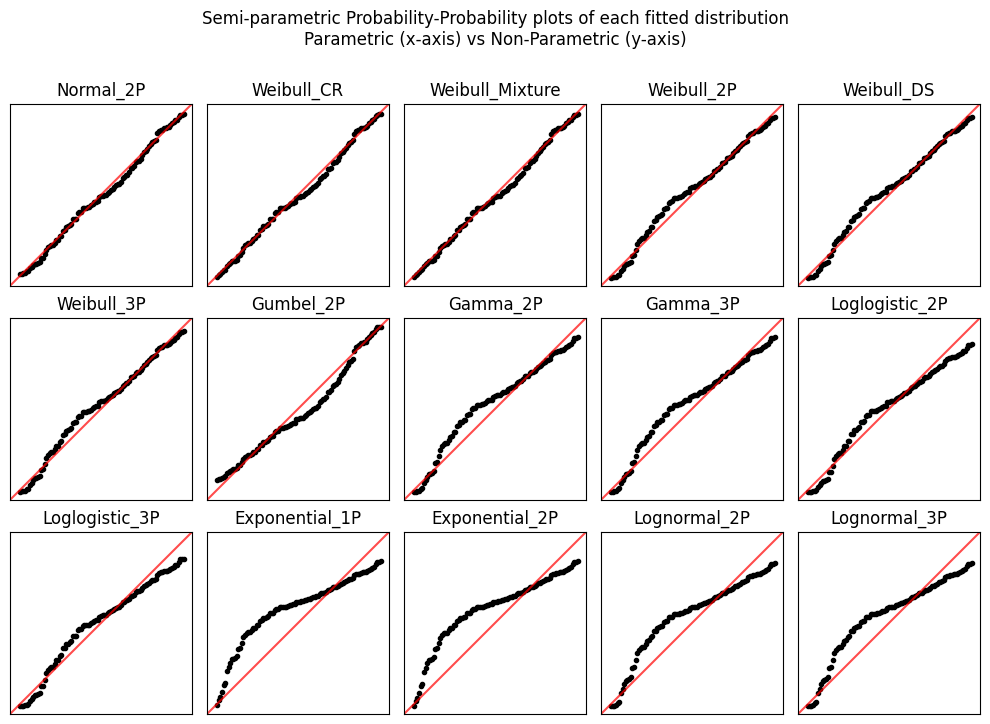

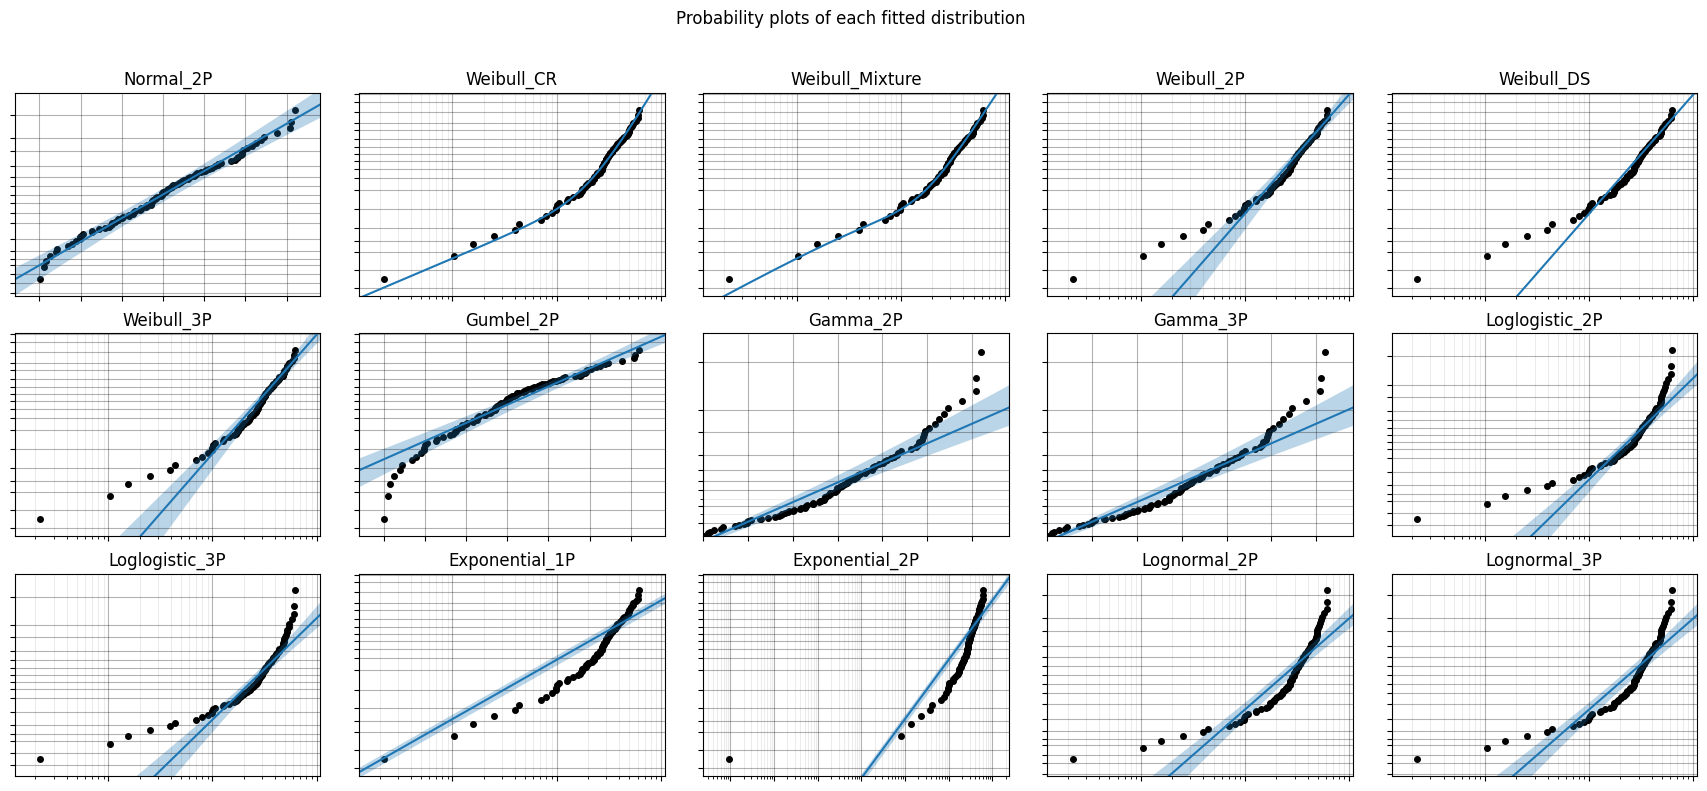

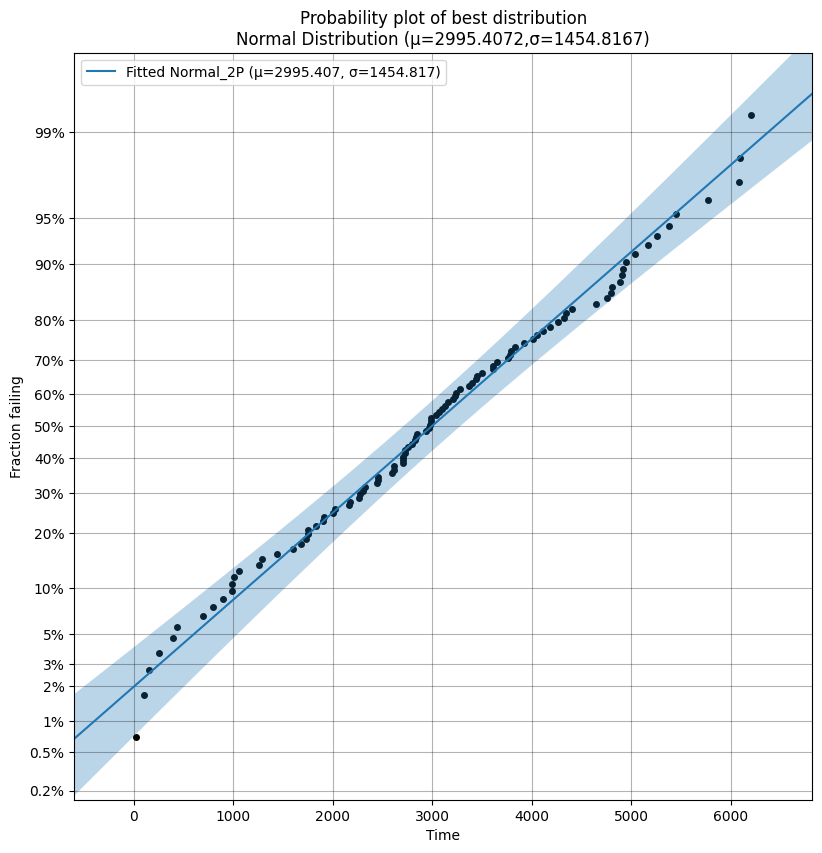

In [7]:
reliability.Fitters.Fit_Everything(failures=ttfs.values, show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True, show_best_distribution_probability_plot=True)

### Fitting results

The table of results has been ranked by BIC to show us that Gaussian was the best fitting distribution for this dataset. This is what we expected since the data was generated using Gaussian(alpha=3000, beta=1500).

### Data generation

Now that we have the actual data generation distribution, we can generate more data (blue histogram).


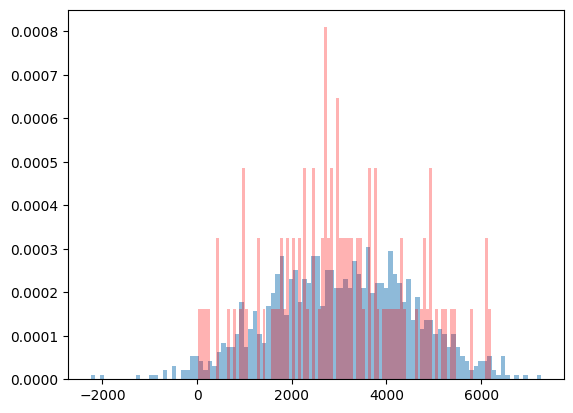

In [8]:
X = np.random.normal(3000, 1500,size=1000)
plt.hist(X, bins=100, density=True, alpha=0.5)
plt.hist(ttfs, bins=100, density=True, alpha=0.3, color='red')
plt.show()